In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Subset

import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print("Running on device:", DEVICE.upper())

Running on device: CUDA


In [2]:
from model import NeuralNetwork
from data_loader import *
from base import GradientFreeOptimization

In [3]:
train_loader = load_mnist_train(samples_per_class=100, seed=42, batch_size=64)
test_loader = load_mnist_test(batch_size=64)

Size of balanced training dataset: 1000
Size of balanced test dataset: 10000


In [4]:
# Step 4: Choose a loss function and optimizer
model = NeuralNetwork().to(DEVICE)

In [5]:
gfo = GradientFreeOptimization(NeuralNetwork, test_loader, DEVICE)

In [6]:
max_iterations = 1000000
popsize = 100

BDE with B=10 and **vectorized random** $F = [0.1, 1.0]$

In [27]:
# BLOCK DE, BS=10 vectorized rand1bin
block_size=10
saved_output = np.load(f"output-bde/ann_bde_b{block_size}_vectorizedF_01_10_maxFE{max_iterations*popsize}_mnist_training_history.npz")
params = saved_output['best_solution']
bdevf_test_f1 = gfo.fitness_func(params) * -100
bdevf_train_f1 = saved_output['fitness_history']
bdevf_train_f1_last = bdevf_train_f1[-1] * -100
bdevf_curr_FE = len(saved_output['fitness_history'])*popsize

In [38]:
# DE vectoized order1bin
saved_output = np.load(f"output-de-order1/ann_de_np100_order1bin_maxFE100000000_mnist_training_history_0 copy.npz")
params = saved_output['best_solution']
devf_np10_test_f1 = gfo.fitness_func(params) * -100
devf_np10_train_f1 = saved_output['fitness_history']
devf_np10_train_f1_last = devf_np10_train_f1[-1] * -100
devf_np10_curr_FE = len(saved_output['fitness_history'])*popsize

In [32]:
# DE vectorized rand1bin
saved_output = np.load(f"output-de/ann_de_vectorizedF_01_10_maxFE{max_iterations*popsize}_run1_mnist_training_history.npz")
params = saved_output['best_solution']
devf_r1_test_f1 = gfo.fitness_func(params) * -100
devf_r1_train_f1 = saved_output['fitness_history']
devf_r1_train_f1_last = devf_r1_train_f1[-1] * -100
devf_r1_curr_FE = len(saved_output['fitness_history'])*popsize

In [33]:
# DE
saved_output = np.load(f"output-de/ann_de_vectorizedF_01_10_maxFE{max_iterations*popsize}_run2_mnist_training_history.npz")
params = saved_output['best_solution']
devf_r2_test_f1 = gfo.fitness_func(params) * -100
devf_r2_train_f1 = saved_output['fitness_history']
devf_r2_train_f1_last = devf_r2_train_f1[-1] * -100
devf_r2_curr_FE = len(saved_output['fitness_history'])*popsize

In [34]:
# BLOCK DE, BS=10
block_size=10
saved_output = np.load(f"output-bde/ann_bde_b{block_size}_maxFE{max_iterations*popsize}_mnist_training_history.npz")
params = saved_output['best_solution']
bde_test_f1 = gfo.fitness_func(params) * -100
bde_train_f1 = saved_output['fitness_history']
bde_train_f1_last = bde_train_f1[-1] * -100
bde_curr_FE = len(saved_output['fitness_history'])*popsize

In [35]:
# DE
saved_output = np.load(f"output-de/ann_de_maxFE{max_iterations*popsize}_mnist_training_history.npz")
params = saved_output['best_solution']
de_test_f1 = gfo.fitness_func(params) * -100
de_train_f1 = saved_output['fitness_history']
de_train_f1_last = de_train_f1[-1] * -100
de_curr_FE = len(saved_output['fitness_history'])*popsize

In [39]:
import pandas as pd

table_df = pd.DataFrame({"": ["Train", "Test"],
                         "Block DE (BDE) BS=10": [bde_train_f1_last, bde_test_f1],
                         "DE": [de_train_f1_last, de_test_f1],
                         "Block DE (BDE) vectorized F BS=10": [bdevf_train_f1_last, bdevf_test_f1],
                         "DE vectorized F run1": [devf_r1_train_f1_last, devf_r1_test_f1],
                         "DE vectorized F run2": [devf_r2_train_f1_last, devf_r2_test_f1],
                         "DE order1 vectorized F": [devf_np10_train_f1_last, devf_np10_test_f1],
                         }
                       )
table_df.head()

,,Block DE (BDE) BS=10,DE,Block DE (BDE) vectorized F BS=10,DE vectorized F run1,DE vectorized F run2,DE order1 vectorized F
0,Train,77.347709,73.130953,67.727774,79.260770,83.525788,66.077297
1,Test,65.094013,60.641113,62.207014,71.706874,74.254744,58.325720


In [14]:
table_df.to_csv(f"output/ann_bde_b{block_size}_FE{bde_curr_FE}_de_FE{de_curr_FE}_vectorizedF_01_10_mnist_comparison.csv", index=False)

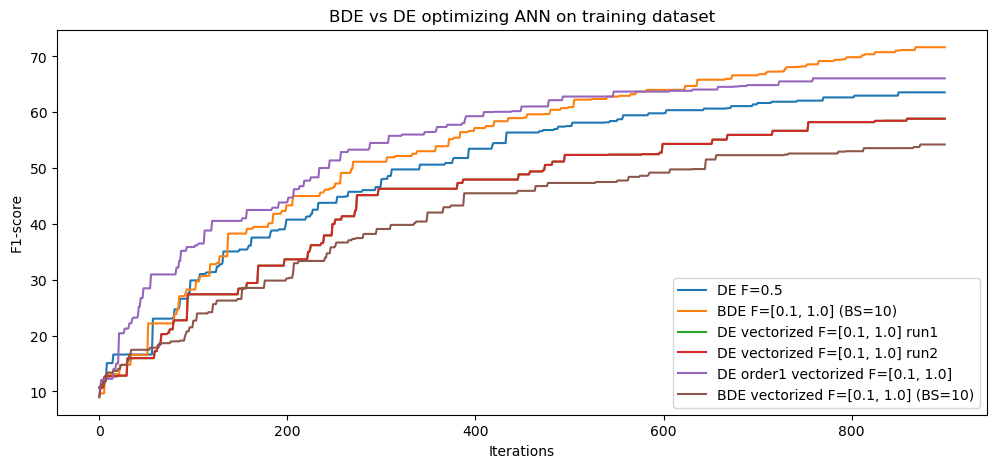

In [42]:
    max_iter=900
    
    plt.figure(figsize=(12, 5))
    plt.plot(de_train_f1[:max_iter] * -100, label='DE F=0.5')
    plt.plot(bde_train_f1[:max_iter] * -100, label='BDE F=[0.1, 1.0] (BS=10)')
    plt.plot(devf_r1_train_f1[:max_iter] * -100, label='DE vectorized F=[0.1, 1.0] run1')
    plt.plot(devf_r2_train_f1[:max_iter] * -100, label='DE vectorized F=[0.1, 1.0] run2')
    plt.plot(devf_np10_train_f1[:max_iter] * -100, label='DE order1 vectorized F=[0.1, 1.0]')
    plt.plot(bdevf_train_f1[:max_iter] * -100, label='BDE vectorized F=[0.1, 1.0] (BS=10)')
    plt.xlabel('Iterations')
    plt.ylabel('F1-score')
    plt.legend()
    plt.title("BDE vs DE optimizing ANN on training dataset")
    # plt.savefig(f"output/ann_bde_b{block_size}_FE{bde_curr_FE}_de_FE{de_curr_FE}_vectorizedF_01_10_mnist_training_plot.png")
    plt.show()

BDE with B=10 and F randomly selected in range of $[0.1, 1.0]$

In [34]:
# BLOCK DE, BS=10
block_size=10
saved_output = np.load(f"output-bde/ann_bde_b{block_size}_maxFE{max_iterations*popsize}_mnist_training_history.npz")
params = saved_output['best_solution']
bde_test_f1 = gfo.fitness_func(params) * -100
bde_train_f1 = saved_output['fitness_history']
bde_train_f1_last = bde_train_f1[-1] * -100
bde_curr_FE = len(saved_output['fitness_history'])*popsize

In [35]:
# DE
saved_output = np.load(f"output-de/ann_de_maxFE{max_iterations*popsize}_mnist_training_history.npz")
params = saved_output['best_solution']
de_test_f1 = gfo.fitness_func(params) * -100
de_train_f1 = saved_output['fitness_history']
de_train_f1_last = de_train_f1[-1] * -100
de_curr_FE = len(saved_output['fitness_history'])*popsize

In [36]:
import pandas as pd

table_df = pd.DataFrame({"": ["Train", "Test"], "Block DE (BDE) BS=10": [bde_train_f1_last, bde_test_f1], "DE": [de_train_f1_last, de_test_f1]})
table_df.head()

,,Block DE (BDE) BS=10,DE
0,Train,77.347709,73.130953
1,Test,65.094013,60.641113


In [37]:
table_df.to_csv(f"output/ann_bde_b{block_size}_FE{bde_curr_FE}_de_FE{de_curr_FE}_mnist_comparison.csv", index=False)

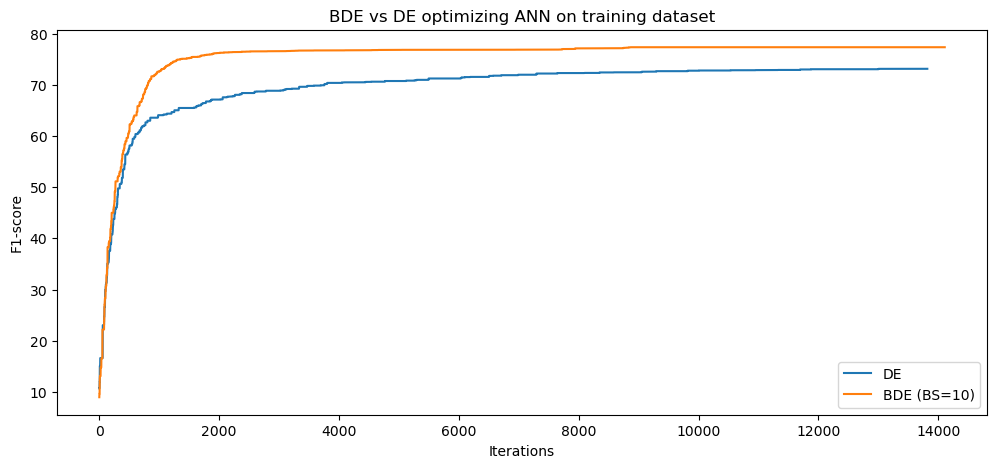

In [46]:
    plt.figure(figsize=(12, 5))
    plt.plot(de_train_f1 * -100, label='DE')
    plt.plot(bde_train_f1 * -100, label='BDE (BS=10)')
    plt.xlabel('Iterations')
    plt.ylabel('F1-score')
    plt.legend()
    plt.title("BDE vs DE optimizing ANN on training dataset")
    plt.savefig(f"output/ann_bde_b{block_size}_FE{bde_curr_FE}_de_FE{de_curr_FE}_mnist_training_plot.png")
    plt.show()

BDE B=10, comparison between F randomly selected in range of $[0.1, 0.5]$ and $[0.1, 1.5]$ vs DE

In [12]:
# BLOCK DE, BS=10 F=[0.1, 0.5]
block_size=10
saved_output = np.load(f"output/ann_bde_b10_F_0.1_0.5_FE100000000_mnist_training_history.npz")
params = saved_output['best_solution']
bde05_test_f1 =  gfo.fitness_func(params) * -100
bde05_train_f1 = saved_output['fitness_history']
bde05_train_f1_last = bde05_train_f1[-1] * -100
bde05_curr_FE = len(saved_output['fitness_history'])

In [13]:
# BLOCK DE, BS=10 F=[0.1, 1.5]
block_size=10
saved_output = np.load(f"output/ann_bde_b10_F_0.1_1.5_FE100000000_mnist_training_history.npz")
params = saved_output['best_solution']
bde15_test_f1 =  gfo.fitness_func(params) * -100
bde15_train_f1 = saved_output['fitness_history']
bde15_train_f1_last = bde15_train_f1[-1] * -100
bde15_curr_FE = len(saved_output['fitness_history'])

In [14]:
# DE
saved_output = np.load(f"output/ann_de_FE{max_iterations*popsize}_mnist_training_history.npz")
params = saved_output['best_solution']
de_test_f1 =  gfo.fitness_func(params) * -100
de_train_f1 = saved_output['fitness_history']
de_train_f1_last = de_train_f1[-1] * -100
de_curr_FE = len(saved_output['fitness_history'])

In [15]:
import pandas as pd

table_df = pd.DataFrame({"": ["Train", "Test"], "Block DE (BDE) BS=10 F=[0.1, 0.5]": [bde05_train_f1_last, bde05_test_f1], "Block DE (BDE) BS=10 F=[0.1, 1.5]": [bde15_train_f1_last, bde15_test_f1], "DE": [de_train_f1_last, de_test_f1]})
table_df.head()

,,"Block DE (BDE) BS=10 F=[0.1, 0.5]","Block DE (BDE) BS=10 F=[0.1, 1.5]",DE
0,Train,71.228204,54.447603,76.864006
1,Test,61.216194,52.377511,68.638388


In [17]:
table_df.to_csv(f"output/ann_bde_b{block_size}_F[0.1,0.5]_FE{bde05_curr_FE}_F[0.1,1.5]_FE{bde15_curr_FE}_de_FE{de_curr_FE}_mnist_comparison.csv", index=False)

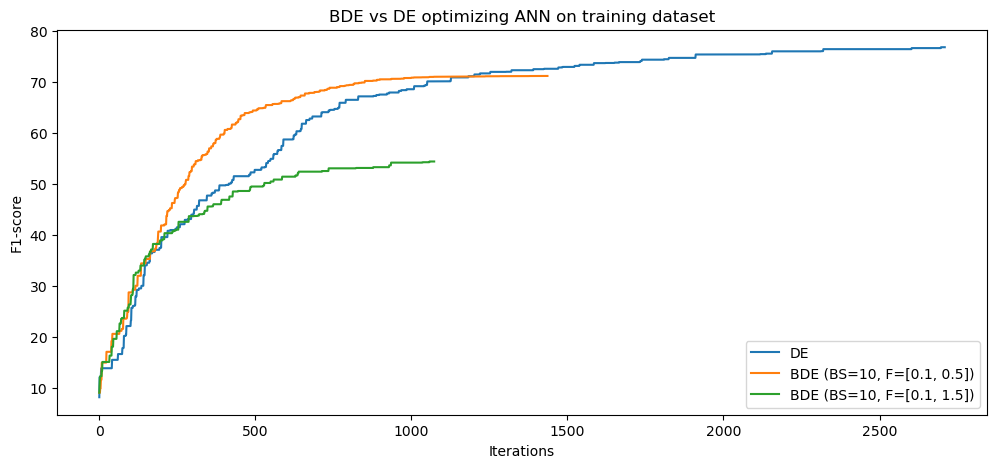

In [18]:
    plt.figure(figsize=(12, 5))
    plt.plot(de_train_f1 * -100, label='DE')
    plt.plot(bde05_train_f1 * -100, label='BDE (BS=10, F=[0.1, 0.5])')
    plt.plot(bde15_train_f1 * -100, label='BDE (BS=10, F=[0.1, 1.5])')
    plt.xlabel('Iterations')
    plt.ylabel('F1-score')
    plt.legend()
    plt.title("BDE vs DE optimizing ANN on training dataset")
    plt.savefig(f"output/ann_bde_b{block_size}_F[0.1,0.5]_FE{bde05_curr_FE}_F[0.1,1.5]_FE{bde15_curr_FE}_de_FE{de_curr_FE}_mnist_training_plot.png")
    plt.show()

BDE with B=10, 20, 50, 100, 1000 and F randomly selected in range of $[0.1, 1.0]$ vs DE

In [7]:
# BLOCK DE, BS=10 F=[0.1, 0.5]
block_size=10
saved_output = np.load(f"output-bde/ann_bde_b{block_size}_maxFE100000000_mnist_training_history.npz")
params = saved_output['best_solution']
bdeb10_test_f1 =  gfo.fitness_func(params) * -100
bdeb10_train_f1 = saved_output['fitness_history']
bdeb10_train_f1_last = bdeb10_train_f1[-1] * -100
bdeb10_curr_FE = len(saved_output['fitness_history'])*popsize

In [17]:
# BLOCK DE, BS=10 F=[0.1, 1.5]
block_size=20
saved_output = np.load(f"output/ann_bde_b{block_size}_maxFE100000000_mnist_training_history.npz")
params = saved_output['best_solution']
bdeb20_test_f1 =  gfo.fitness_func(params) * -100
bdeb20_train_f1 = saved_output['fitness_history']
bdeb20_train_f1_last = bdeb20_train_f1[-1] * -100
bdeb20_curr_FE = len(saved_output['fitness_history'])*popsize

In [18]:
# BLOCK DE, BS=10 F=[0.1, 1.5]
block_size=50
saved_output = np.load(f"output/ann_bde_b{block_size}_maxFE100000000_mnist_training_history.npz")
params = saved_output['best_solution']
bdeb50_test_f1 =  gfo.fitness_func(params) * -100
bdeb50_train_f1 = saved_output['fitness_history']
bdeb50_train_f1_last = bdeb50_train_f1[-1] * -100
bdeb50_curr_FE = len(saved_output['fitness_history'])*popsize

In [8]:
# BLOCK DE, BS=10 F=[0.1, 1.5]
block_size=100
saved_output = np.load(f"output-bde/ann_bde_b{block_size}_maxFE100000000_mnist_training_history.npz")
params = saved_output['best_solution']
bdeb100_test_f1 =  gfo.fitness_func(params) * -100
bdeb100_train_f1 = saved_output['fitness_history']
bdeb100_train_f1_last = bdeb100_train_f1[-1] * -100
bdeb100_curr_FE = len(saved_output['fitness_history'])*popsize

In [21]:
# BLOCK DE, BS=10 F=[0.1, 1.5]
block_size=1000
saved_output = np.load(f"output/ann_bde_b{block_size}_maxFE100000000_mnist_training_history.npz")
params = saved_output['best_solution']
bdeb1000_test_f1 =  gfo.fitness_func(params) * -100
bdeb1000_train_f1 = saved_output['fitness_history']
bdeb1000_train_f1_last = bdeb1000_train_f1[-1] * -100
bdeb1000_curr_FE = len(saved_output['fitness_history'])*popsize

In [10]:
# DE
saved_output = np.load(f"output-de/ann_de_maxFE{max_iterations*popsize}_mnist_training_history.npz")
params = saved_output['best_solution']
de_test_f1 =  gfo.fitness_func(params) * -100
de_train_f1 = saved_output['fitness_history']
de_train_f1_last = de_train_f1[-1] * -100
de_curr_FE = len(saved_output['fitness_history'])*popsize

In [11]:
import pandas as pd

table_df = pd.DataFrame({"": ["Train", "Test"], "BDE BS=10": [bdeb10_train_f1_last, bdeb10_test_f1],
                         #"BDE BS=20": [bdeb20_train_f1_last, bdeb20_test_f1],
                         #"BDE BS=50": [bdeb50_train_f1_last, bdeb50_test_f1],
                         "BDE BS=100": [bdeb100_train_f1_last, bdeb100_test_f1],
                         #"BDE BS=1000": [bdeb1000_train_f1_last, bdeb1000_test_f1],
                         "DE": [de_train_f1_last, de_test_f1]})
table_df.head()

,,BDE BS=10,BDE BS=100,DE
0,Train,77.347709,54.770872,73.130953
1,Test,65.094013,45.662139,60.641113


In [12]:
table_df.to_csv(f"output/ann_bde_b{10}_FE{bdeb10_curr_FE}_b{100}_FE{bdeb100_curr_FE}_de_FE{de_curr_FE}_mnist_comparison.csv", index=False)

In [ ]:
table_df.to_csv(f"output/ann_bde_b{10}_FE{bdeb10_curr_FE}_b{20}_FE{bdeb20_curr_FE}_b{50}_FE{bdeb50_curr_FE}_b{100}_FE{bdeb100_curr_FE}_b{1000}_FE{bdeb1000_curr_FE}_de_FE{de_curr_FE}_mnist_comparison.csv", index=False)

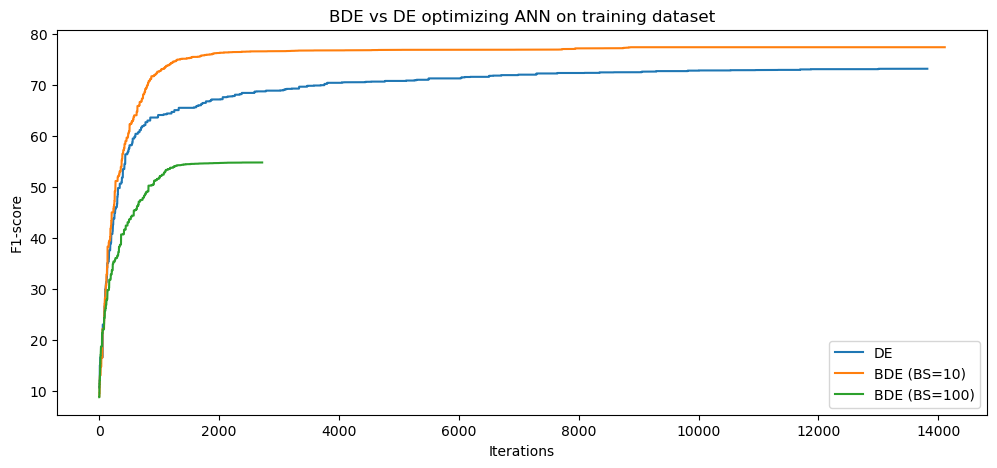

In [13]:
    plt.figure(figsize=(12, 5))
    plt.plot(de_train_f1 * -100, label='DE')
    plt.plot(bdeb10_train_f1 * -100, label='BDE (BS=10)')
    #plt.plot(bdeb20_train_f1 * -100, label='BDE (BS=20)')
    #plt.plot(bdeb50_train_f1 * -100, label='BDE (BS=50)')
    plt.plot(bdeb100_train_f1 * -100, label='BDE (BS=100)')
    #plt.plot(bdeb1000_train_f1 * -100, label='BDE (BS=1000)')
    
    plt.xlabel('Iterations')
    plt.ylabel('F1-score')
    plt.legend()
    plt.title("BDE vs DE optimizing ANN on training dataset")
    plt.savefig(f"output/ann_bde_b{10}_FE{bdeb10_curr_FE}_b{100}_FE{bdeb100_curr_FE}_de_FE{de_curr_FE}_mnist_training_plot.png")
    plt.show()